## Titanic advanced

### Dataset

In [1]:
"""
This notebook trains machine learning models that predict the probability of
survival of Titanic passengers. The model is based on a multiplied passenger list, stored
in a CSV file. Instead of the original 2201 passengers the file contains 220,100 records,
in order to get statistically stable results. The probability of survival
is predicted with the features Sex, Class and Age.
"""

# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, plot_roc_curve

# Configuration
DATA_PATH = "../data/"
CSV_PATH = DATA_PATH + "titanic_advanced.csv"

# Load data set
titanic_frame = pd.read_csv(CSV_PATH, sep=";")
print(titanic_frame.head().to_string(), "\n")

    ID Class   Sex    Age Survived
0  3.0   3rd  Male  Child       No
1  3.1   3rd  Male  Child       No
2  3.2   3rd  Male  Child       No
3  3.3   3rd  Male  Child       No
4  3.4   3rd  Male  Child       No 



### Statistics

In [2]:
print("Passengers:", len(titanic_frame))

survivors = titanic_frame[titanic_frame['Survived'] == "Yes"]
print("Survivors:", len(survivors))

survivors_percent = len(survivors) / len(titanic_frame)
print("Survivors %:", survivors_percent * 100)

Passengers: 220100
Survivors: 71100
Survivors %: 32.30349840981372


### Features

In [3]:
# Transform strings to numbers
class_encoder = preprocessing.LabelEncoder()
class_encoder.fit(titanic_frame["Class"])

age_encoder = preprocessing.LabelEncoder()
age_encoder.fit(titanic_frame["Age"])

sex_encoder = preprocessing.LabelEncoder()
sex_encoder.fit(titanic_frame["Sex"])

# Create a data frame with features
encoded_frame = pd.DataFrame({
    "Class": class_encoder.transform(titanic_frame["Class"]),
    "Age": age_encoder.transform(titanic_frame["Age"]),
    "Sex": sex_encoder.transform(titanic_frame["Sex"]),
    "Survived": titanic_frame["Survived"]
})

# Split Training and Test set
training_frame, test_frame = train_test_split(encoded_frame, test_size=0.3)

print("Size training set: ", len(training_frame))
print("Size test set: ", len(test_frame), "\n")

features_train = training_frame[["Class", "Age", "Sex"]]
features_test = test_frame[["Class", "Age", "Sex"]]

target_train = training_frame["Survived"]
target_test = test_frame["Survived"]

print(features_train.head().to_string())

Size training set:  154070
Size test set:  66030 

        Class  Age  Sex
170284      3    0    1
167594      2    0    1
2989        2    1    1
104846      3    0    1
177801      3    0    1


### Decision Tree

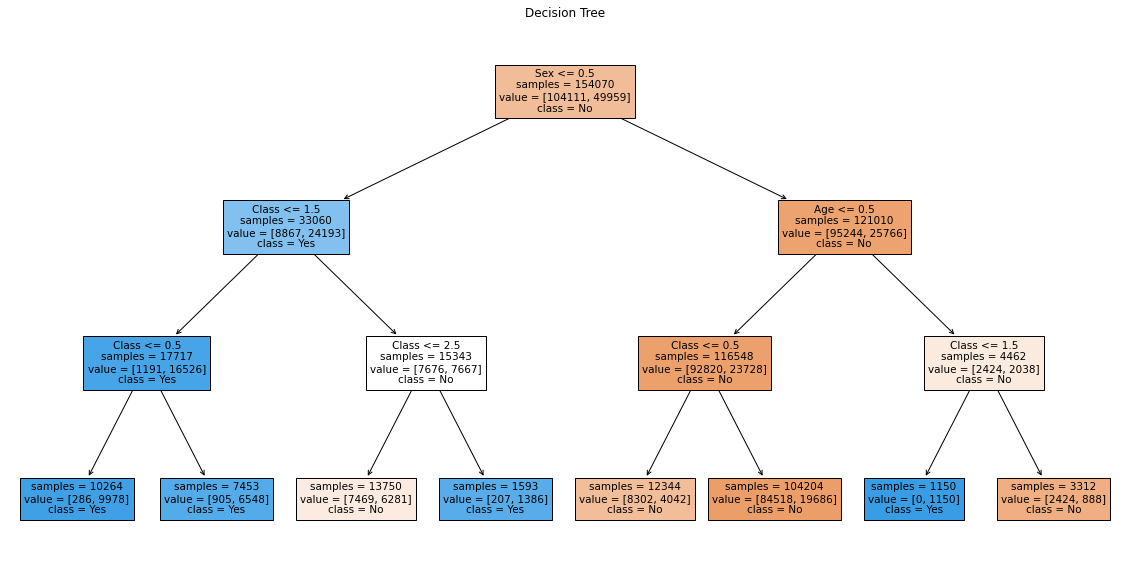

In [4]:
# Train decision tree
tree_model = tree.DecisionTreeClassifier(random_state=0, max_depth=3)
tree_model = tree_model.fit(features_train, target_train)

# Plot decision tree
fig = plt.figure(figsize=(20,10))
tree.plot_tree(
    tree_model,
    feature_names=features_train.columns,
    filled=True,
    impurity=False,
    class_names=["No", "Yes"])

plt.title("Decision Tree")
plt.show()

### Logistic Regression

In [5]:
logit_model = LogisticRegression(random_state=0).fit(features_train, target_train)

print("Logit Model")
print("Intercept:", logit_model.intercept_)
print("Features:", features_train.columns)
print("Coeff:", logit_model.coef_)

Logit Model
Intercept: [1.30936187]
Features: Index(['Class', 'Age', 'Sex'], dtype='object')
Coeff: [[-0.28049956  0.50968372 -2.04870143]]


### Test

In [6]:
tree_predicted = tree_model.predict(features_test)
tree_accuracy = accuracy_score(target_test, tree_predicted)
tree_auc = roc_auc_score(target_test, np.where(tree_predicted == "Yes", 1, 0))
tree_f1 = f1_score(target_test, tree_predicted,  pos_label="Yes")

print("Decision Tree:")
print("Accuracy:", tree_accuracy)
print("AUC:", tree_auc)
print("F1:", tree_f1, "\n")


logit_predicted = logit_model.predict(features_test)
logit_accuracy = accuracy_score(target_test, logit_predicted)
logit_auc = roc_auc_score(target_test, np.where(logit_predicted == "Yes", 1, 0))
logit_f1 = f1_score(target_test, logit_predicted,  pos_label="Yes")

print("Logistic Regression:")
print("Accuracy:", logit_accuracy)
print("AUC:", logit_auc)
print("F1:", logit_f1, "\n")


Decision Tree:
Accuracy: 0.7909283658942905
AUC: 0.6810340346545746
F1: 0.5348876385566523 

Logistic Regression:
Accuracy: 0.7778736937755566
AUC: 0.6998226184479905
F1: 0.5819104358484649 

